1. Load the Dataset
2. Data cleaning & preprocessing
3. Top 50 mentions (mentions in this dataset refers to the @s)
4. Top 50 most frequently used hashtags (#)
5. Rule 1: Extract sentences having mentions of Prime Minister
6. Rule 2: Extract patterns using Prepositions

In [1]:
import glob
import pandas as pd
import re
import spacy
nlp=spacy.load('en_core_web_sm',disable=['ner','textcat'])
from spacy.matcher import Matcher
from spacy import displacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("demonetization_tweets.csv", usecols=['text'], encoding = "ISO-8859-1")
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(5147, 1)

In [3]:
df.tail()

,text
5142,@thehill To The Hill. Shame on you for your an...
5143,RT @saxenavishakha: Ghost of demonetization re...
5144,N d modi fans-d true nationalists of the count...
5145,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...
5146,"@Vidyut B team of BJP. CIA baby. CCTV, EVM but..."


In [4]:
for index,sent in enumerate(df['text'][400:407]):
    print(index+1,".",sent)

1 . What I want to see is investigative journalism, governance of money trail after 50 day #DeMonetization is over &amp; where #India failed as well
2 . "America has the #technology to go cashless, but nobody trusts it enough..." #demonetization https://t.co/u6YFqLMC50
3 . OPPOSITE PARTY JITNE TAKAT #demonetization ko rok ne me lag rhi he itni takat help me kar dte to use achha hota.
4 . So what's the problem if offline cash is getting online, it is now traceable &amp; taxable and this is all about https://t.co/2ulsEBX2Lj
5 . Think, slaves...think. #Demonetization https://t.co/CNw0HrUH1p
6 . RT @MaayaaSarabhai: It's KARMA
 #BlackMoney #demonetization #EkSacchaKadam #NoRollBackOfDeMonetization https://t.co/SVZf84bLkh
7 . When life gives 500 or 1000 reasons to struggle, show the world that you have  2000 reasons to SMILE !!! #demonetization


## Tweet Cleaning

In [17]:
def clean(text):
    text = re.sub('(RT|\r|\n|\d|amp|!|\+|\"|\$|,|:|;|<[a-z]+>|<U\+[\w\d]+>|https?://[\w\d./\-]+)+','',str(text))
    # removing hyphens
    text = re.sub('-',' ',str(text))
    text = re.sub('- ','',str(text))
    # removing salutations
    text = re.sub('Mr\.','Mr',str(text))
    text = re.sub('Mrs\.','Mrs',str(text))
    text = text.lower()
    return text

In [18]:
df['clean_tweet'] = df['text'].apply(clean)

In [19]:
for index,sent in enumerate(df['clean_tweet'][:7]):
    print(index+1,".",sent)

1 .  @rssurjewala critical question was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &
2 .  @hemant_ did you vote on #demonetization on modi survey app?
3 .  @roshankar former finsec rbi dy governor cbdt chair  harvard professor lambaste #demonetization.if not for aam aadmi listen to th
4 .  @ani_news gurugram (haryana) post office employees provide cash exchange to patients in hospitals #demonetization 
5 .  @satishacharya reddy wedding @mail_today cartoon #demonetization #reddywedding 
6 . @derekscissors indias #demonetization #blackmoney a symptom not the disease  via @ambazaarmag
7 .  @gauravcsawant rs  lakh looted from a bank in kishtwar in j&k. third such incident since #demonetization. that's how terrorists have


## Top 50 mentions

In [20]:
mentions = df['clean_tweet'].apply(lambda x: re.findall('@\w+', x))
mentions_arr=[]
for x in mentions:
    if x != None:
        mentions_arr.extend(x)
mentions_count = pd.Series(mentions_arr).value_counts().head(50)
mentions_count

@narendramodi       344
@youtube            144
@pmoindia           107
@arvindkejriwal      83
@arunjaitley         41
@arvindsubraman      35
@evanspiegel         33
@ndtv                30
@bjpindia            27
@rbi                 26
@dasshaktikanta      24
@stupidosaur         24
@timesofindia        24
@officeofrg          23
@sardesairajdeep     22
@annielowrey         21
@shashitharoor       21
@dna                 20
@cnnnews             19
@cgdev               19
@thedarjchron        19
@mamataofficial      19
@ani_news            19
@indiatoday          18
@navkendar_idc       17
@centerofright       16
@memeghnad           16
@aamaadmiparty       16
@theofficialsbi      15
@postcard_news       14
@jamewils            14
@swamy               14
@jpal_global         13
@paytm               13
@cnvey               12
@digvijaya_          12
@timesnow            12
@finminindia         12
@jairajp             10
@sonunigam           10
@yrdeshmukh          10
@madmanweb      

## Top 50 Hashtags

In [21]:
hashtags = df['clean_tweet'].apply(lambda x: re.findall('#\w+', x))
hash_arr=[]
for x in hashtags:
    if x != None:
        hash_arr.extend(x)
hash_count = pd.Series(hash_arr).value_counts().head(50)
hash_count

#demonetization          2841
#india                    162
#blackmoney                72
#modi                      45
#demonetisation            44
#narendramodi              32
#bjp                       28
#youtube                   28
#news                      25
#rbi                       19
#snapchat                  18
#cgdtalks                  18
#bypolls                   17
#northeast                 17
#___                       16
#atm                       16
#fintech                   16
#realestate                15
#pmmodi                    15
#bank                      14
#digital                   14
#cashless                  14
#currencyban               14
#summary                   14
#payments                  13
#noteban                   13
#banks                     13
#cash                      13
#janjankibaat              12
#jankibaat                 12
#startups                  12
#delhi                     12
#demonetizationeffect      12
#netascash

## Word Cloud

In [22]:
def generate_wordcloud(data):
    wc = WordCloud(width=400, height=200, max_words=200, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(14,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [23]:
combined_tweets=' '.join(df.clean_tweet.values)
doc=nlp(combined_tweets)
tokens=[token for token in doc if (token.is_stop==False and token.is_punct==False and token.is_space==False)]
word_freq = pd.Series([token.text for token in tokens]).value_counts()

In [24]:
len(word_freq)

11113

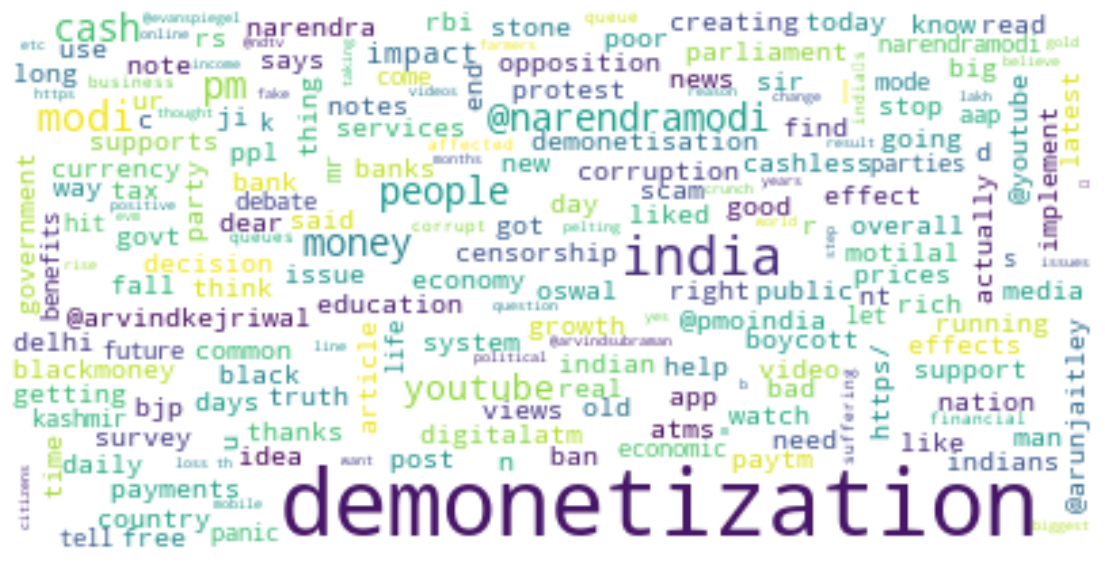

In [25]:
generate_wordcloud(word_freq)

## Rule 1: Extract sentences having mentions of Prime Minister

In [26]:
# splitting the sentences
def sentences(text):
    text = re.sub('(@|#)+','',str(text))
    # split sentences & questions
    text = re.split('[.?]',text)
    clean_sent = []
    for sent in text:
        if sent!='':
            clean_sent.append(sent)
    return clean_sent

In [27]:
df['sentence'] = df['clean_tweet'].apply(sentences)

In [28]:
df['sentence'][5146]

['vidyut b team of bjp',
 ' cia baby',
 " cctv evm but with vvpat support 'surgical strikes' jnu drama timepass in demon\x85 "]

In [29]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['sentence'])
row_list=[]
# for each tweet
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'sentence']:
        row_list.append({'sentence':sent})
df2 = pd.DataFrame(row_list)

In [30]:
df2.tail(10)

,sentence
8266,shame on you for your antisemitic demonetizat...
8267,
8268,saxenavishakha ghost of demonetization return...
8269,n d modi fans d true nationalists of the count...
8270,stupidosaur vidyut b team of bjp
8271,cia baby
8272,cctv evm but with vvpat support 'surgical str...
8273,vidyut b team of bjp
8274,cia baby
8275,cctv evm but with vvpat support 'surgical str...


In [31]:
df2.shape

(8276, 1)

In [32]:
def find_PM(text):
    names=[]
    doc=nlp(text)
    pm_list = ['modi','narendramodi','pmmodi','pm','modibharosa','pmoindia','prime minister','pm of india']
    pattern=[{'LOWER':{'IN':pm_list},'OP':'+'}]
    matcher=Matcher(nlp.vocab)
    matcher.add('Names',[pattern])
    matches=matcher(doc)
    # finding patterns in the text
    for i in range(len(matches)):
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        names.append(str(token))
    return names

In [33]:
# extracting sentences with PM's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_PM(df2['sentence'][i]))
# storing the extracted sentences in a dataframe
df2['PM_Names'] = extracted_sentences

In [34]:
sentences_pm = []
for i in range(df2.shape[0]):
    if df2['PM_Names'][i] != []:
        sentences_pm.append(df2['sentence'][i])

In [35]:
len(sentences_pm)

927

In [36]:
sentences_pm[400:407]

['pmoindia security at banks should be increased in millitant & naxal areas',
 ' demonetization arunjaitley narendramodi',
 '»»» srisri ravi shankar roots for demonetization hails pm modicashcleanup cashlesseconomy cash\x85 ',
 ' sjvatsal truth (modi bjp india malaya kingfisher indiafightsblackmoney indiafirst  modifightscorruption demonetization black\x85',
 ' aashabisht narendramodi banks hv been given enough cash then why atms lacking cash',
 " (deep_anchor)india's modi didn't do his homework demonetization ",
 'drshobha pmoindia not affected individually but d brute show of money and its power has definitely come down in society demonetization']

## Rule 2: Extract patterns using Prepositions

In [37]:
displacy.render(nlp(' you get a call from taxmen only when credit card bills of over 2 lakhs wer\x85 '),style='dep',jupyter=True)

In [38]:
def rule2(text):
    doc=nlp(text)
    sent=[]
    for token in doc:
        if (token.pos_=='ADP') and (token.dep_ == 'prep'):
            phrase=''
            if (token.head.pos_ in ['NOUN','VERB']):
                phrase += token.head.text
                phrase += ' '+token.text
                for right_tok in token.rights:
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                if len(phrase)>2:
                    sent.append(phrase)
    return sent

In [39]:
# create a df containing sentence and its output for rule 2
row_list = []
# df2 contains all the sentences from all the tweets
for i in range(len(df2)):
    sent = df2.loc[i,'sentence']
    output = rule2(sent)
    dict1 = {'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule2 = pd.DataFrame(row_list)

In [40]:
# for non-empty output rows
df_show2 = pd.DataFrame(columns=df_rule2.columns)
for row in range(len(df_rule2)):
    if len(df_rule2.loc[row,'Output'])!=0:
        df_show2 = df_show2.append(df_rule2.loc[row,:])
df_show2.reset_index(inplace=True, drop=True)
df_show2.head()

,Sent,Output
0,rssurjewala critical question was paytm infor...,[informed about edict]
1,hemant_ did you vote on demonetization on mod...,"[vote on demonetization, demonetization on modi]"
2,if not for aam aadmi listen to th,"[listen for aadmi, listen to]"
3,ani_news gurugram (haryana) post office emplo...,"[provide to patients, patients in demonetization]"
4,derekscissors indias demonetization blackmone...,[disease via ambazaarmag]


In [41]:
# separate noun, preposition and noun
dis_dict = dict()
dis_list = []

for i in range(len(df_show2)):
    sentence = df_show2.loc[i,'Sent']
    output = df_show2.loc[i,'Output']
    for sent in output:
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]
        dis_dict = {'Sent':sentence,'Noun1/Verb1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)

df_sep2= pd.DataFrame(dis_list)

In [42]:
df_sep2.head()

,Sent,Noun1/Verb1,Preposition,Noun2
0,rssurjewala critical question was paytm infor...,informed,about,[edict]
1,hemant_ did you vote on demonetization on mod...,vote,on,[demonetization]
2,hemant_ did you vote on demonetization on mod...,demonetization,on,[modi]
3,if not for aam aadmi listen to th,listen,for,[aadmi]
4,if not for aam aadmi listen to th,listen,to,[]


In [43]:
# top 10 prepositions
df_sep2['Preposition'].value_counts()[:20]

of         1343
in         1237
on          860
for         537
to          344
with        306
from        283
by          257
after       232
at          226
about       192
against     167
via         130
as          111
during      102
like         97
over         76
due          74
out          54
into         48
Name: Preposition, dtype: int64

In [50]:
df_sep2[df_sep2['Preposition']=='against'].head(10)

,Sent,Noun1/Verb1,Preposition,Noun2
25,atheist_krishna before and after gandhi ji he...,standing,against,[demonetization]
42,k followers yet you are not getting enough li...,getting,against,[demonetization]
45,harshkkapoor demonetization survey results af...,fight,against,[blackmoneyna]
69,bhaiyyajispeaks here sardesairajdeep struggli...,answer,against,[demonetization]
91,ashupage a man shaved his head at jantar mant...,protest,against,[demonetization]
135,indiafactsorg demonetization the ultimate wea...,weapon,against,[economy]
137,modi acted against national interest,acted,against,[interest]
220,do you support the opposition's agitation agai...,agitation,against,[demonetization]
233,abhic_ sitaramyechury continue with your rant...,rants,against,[people]
246,justtneeraj thousands of farmers took out a p...,took,against,[demonetization]


In [51]:
# selecting a preposition and looking at its pattern
df_against = df_sep2[df_sep2['Preposition']=='against']
for index, sent in enumerate(df_against["Sent"][:7]):
    print(index+1,".",sent)

1 .  atheist_krishna before and after gandhi ji heard they are standing there against demonetization
2 .  k followers yet you are not getting enough likes for your tweets against demonetization
3 .  harshkkapoor demonetization survey results after  hourslacs opinionsamazing response& commitment in fight against blackmoneyna
4 .  bhaiyyajispeaks here sardesairajdeep struggling for one answer against demonetization he should have taken some congress leader lik
5 .  ashupage a man shaved his head at jantar mantar in protest against demonetization  on th day of the move
6 .  indiafactsorg demonetization the ultimate weapon against black economy  via indiafactsorg
7 . modi acted against national interest
